# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from HANKStickyModel import HANKStickyModelClass

# Solve the model

In [13]:
def solution_routine(model, do_print=False):
    """ solve model """
    # init model
    print('\r'+f' -------- Model: {model.name} ---------')
    # solve model
    print("\r"+'Find steady state  ',end="")
    model.find_ss(do_print=do_print)
    print("\r"+'Compute Jacobians  ',end="")
    model.compute_jacs(do_print=do_print)
    print("\r"+'Find transition path',end="")
    model.find_transition_path(do_print=do_print, do_print_unknowns=False)
    print("\r"+'Find IRFs           ',end="")
    model.find_IRFs(do_print=do_print)
    print("\r"+'Done                ',end="")
    # return model


In [14]:
model = HANKStickyModelClass(name='baseline', par={'inattention': 0.935, 'start_dbeg_opti': True})

In [15]:
solution_routine(model, do_print=True)

 -------- Model: baseline ---------
Find steady state  Find optimal beta for market clearing
final evaluation
household problem in ss solved in 5.3 secs [757 iterations]
household problem in ss simulated in 1.1 secs [515 iterations]
steady state found in 1.0 mins 1 secs
 beta   = 0.9951
 nu     = 0.6763
Discrepancy in L =  -0.00000000
Discrepancy in Y =  -0.00000000
Compute Jacobians  household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for eg_transfer     in 3.4 secs
curly_Y and curly_D calculated for ez              in 3.3 secs
curly_Y and curly_D calculated for ra              in 3.5 secs
curly_Y and curly_D calculated for rl              in 3.3 secs
curly_Y and curly_D calculated for tau             in 3.4 secs
curly_Y and curly_D calculated for wN              in 3.3 secs
curly_E calculated in 2.5 secs
builiding blocks combined in 2.2 secs
household Jacobian computed in 24.9 secs
household inattention = 0.935

full Jacobia

# Testing

note: inputs = steady state value -> expected: constant value (straigt line)

household problem solved along transition path in 1.8 secs
household problem simulated along transition in 0.7 secs



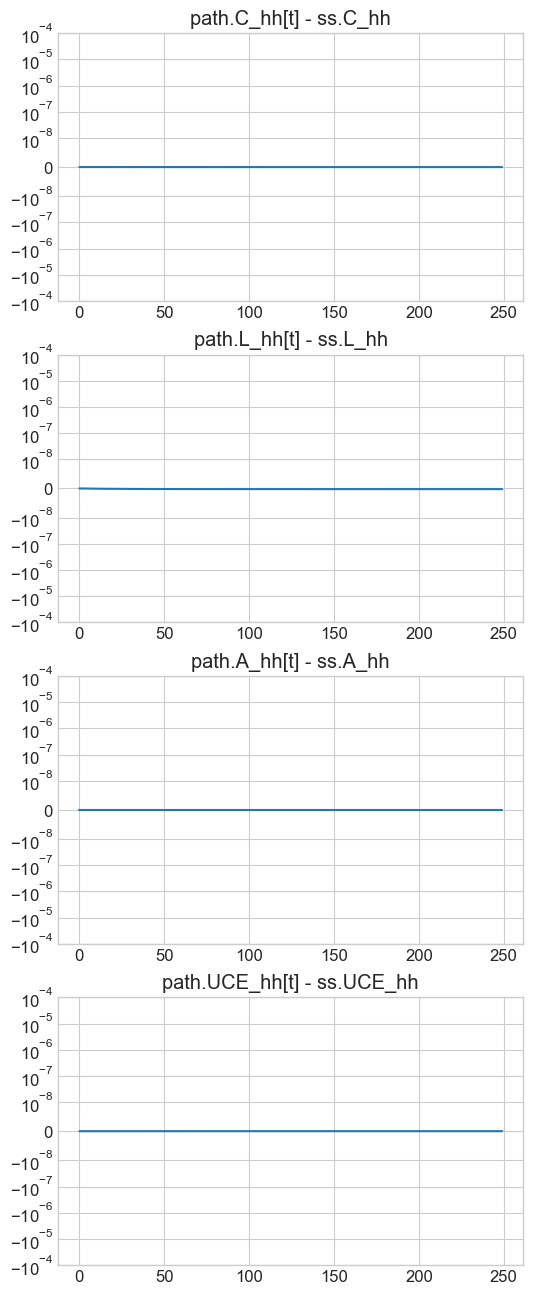

In [16]:
model.test_hh_path()

In [17]:
model.test_path()

note: inputs = steady state value -> expected: no difference to steady state and zero errors

difference to value at steady state:
A              : t0 =  3.5e-10, max abs.  5.9e-10
B              : t0 =  0.0e+00, max abs.  0.0e+00
clearing_A     : t0 =  3.3e-13, max abs.  5.5e-10
clearing_L     : t0 =  3.5e-10, max abs.  3.5e-10
clearing_Y     : t0 = -9.4e-12, max abs.  1.3e-11
Div_int        : t0 =  0.0e+00, max abs.  0.0e+00
Div_k          : t0 =  0.0e+00, max abs.  0.0e+00
Div            : t0 =  0.0e+00, max abs.  0.0e+00
eg             : t0 =  0.0e+00, max abs.  0.0e+00
eg_direct      : t0 =  0.0e+00, max abs.  0.0e+00
eg_distribution: t0 =  0.0e+00, max abs.  0.0e+00
eg_debt        : t0 =  0.0e+00, max abs.  0.0e+00
eg_transfer    : t0 =  0.0e+00, max abs.  0.0e+00
ez             : t0 =  0.0e+00, max abs.  0.0e+00
em             : t0 =  0.0e+00, max abs.  0.0e+00
G              : t0 =  0.0e+00, max abs.  0.0e+00
i              : t0 =  0.0e+00, max abs.  0.0e+00
I              : t0

note: differences should only be due to numerical errors

household inattention = 0.935
-> sticky information jacs based on direct method wont be correct
direct method:
finding Jacobian wrt. ghost          : 0 10 20 30 40 [computed in 6.6 secs]
finding Jacobian wrt. eg_transfer    : 0 10 20 30 40 [computed in 6.6 secs]
finding Jacobian wrt. ez             : 0 10 20 30 40 [computed in 6.6 secs]
finding Jacobian wrt. ra             : 0 10 20 30 40 [computed in 6.7 secs]
finding Jacobian wrt. rl             : 0 10 20 30 40 [computed in 6.9 secs]
finding Jacobian wrt. tau            : 0 10 20 30 40 [computed in 6.5 secs]
finding Jacobian wrt. wN             : 0 10 20 30 40 [computed in 6.5 secs]
household Jacobian computed in 47.1 secs

fake news method:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for eg_transfer     in 3.2 secs
curly_Y and curly_D calculated for ez              in 3.2 secs
curly_Y and curly_D calculated for ra              in

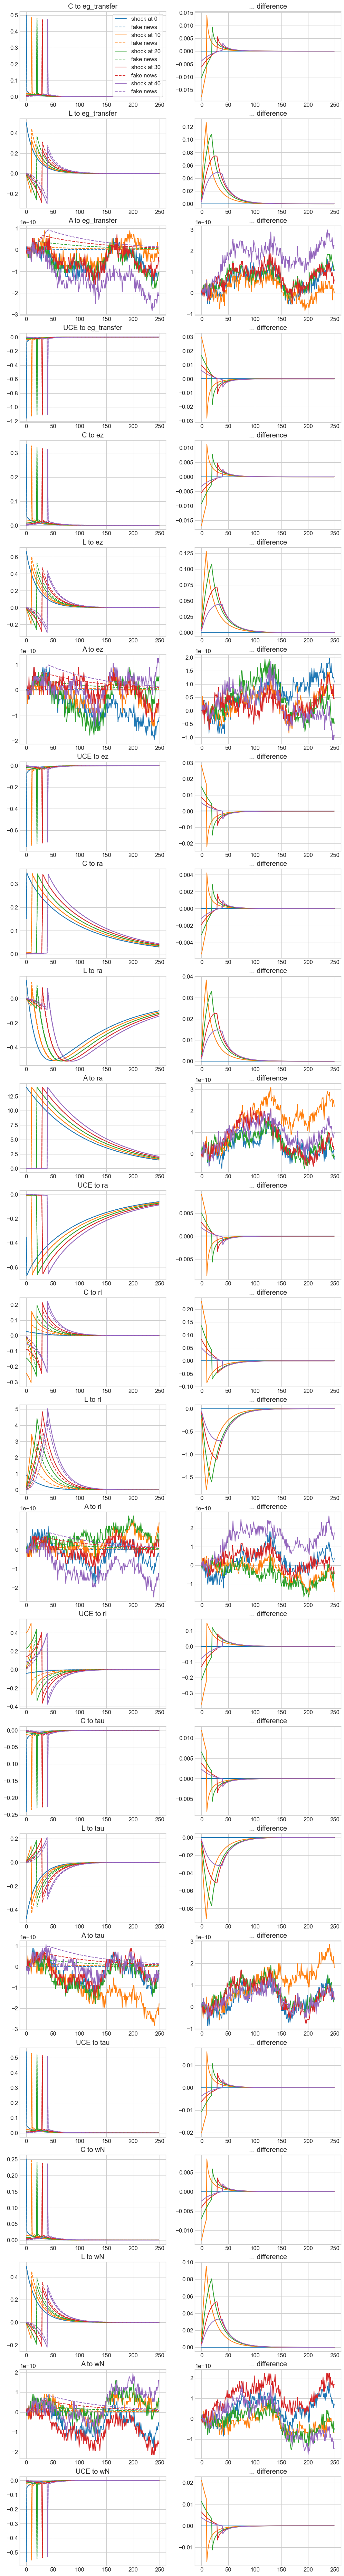

In [18]:
s_list = [0,10,20,30,40]
model.test_jacs(s_list=s_list)

In [28]:
model_sticky.jac[('C_hh', 'ez')][0:4, 0].sum()

0.43474977347024435

# Plotting

In [20]:
# solve example models

updated_par = {'phi_G': 0.4,         # mixed financing of fiscal policy shock
                'jump_eg': 0.01,    # 1% government spending shock
                'rho_eg': 0.9,
                'jump_em': 0.0,
                'taylor': 'linear'}
model = HANKStickyModelClass(name='baseline', par={**updated_par ,**{'inattention': 0.0}})
print("\r"+'Find steady state  ',end="")
model.find_ss(do_print=False)
# model without sticky information
print("\r"+'Compute Jacobians (no sticky) ',end="")
model.compute_jacs(do_print=False)
print("\r"+'Find transition path (no sticky)         ',end="")
model.find_transition_path()
print("\r"+'Find IRFs (no sticky)          ',end="")
model.find_IRFs(do_print=False)

# model with sitcky information
model_sticky = model.copy() # steady state unaffected by sticky information
model_sticky.par.inattention = 0.935
print("\r"+'Compute Jacobians (sticky)    ',end="")
model_sticky.compute_jacs(do_print=False)
print("\r"+'Find transition path (sticky)         ',end="")
model_sticky.find_transition_path()
print("\r"+'Find IRFs (sticky)               ',end="")
model_sticky.find_IRFs(do_print=False)
print("\r"+'Done                     ',end="")

Done                                     

### shocks ###


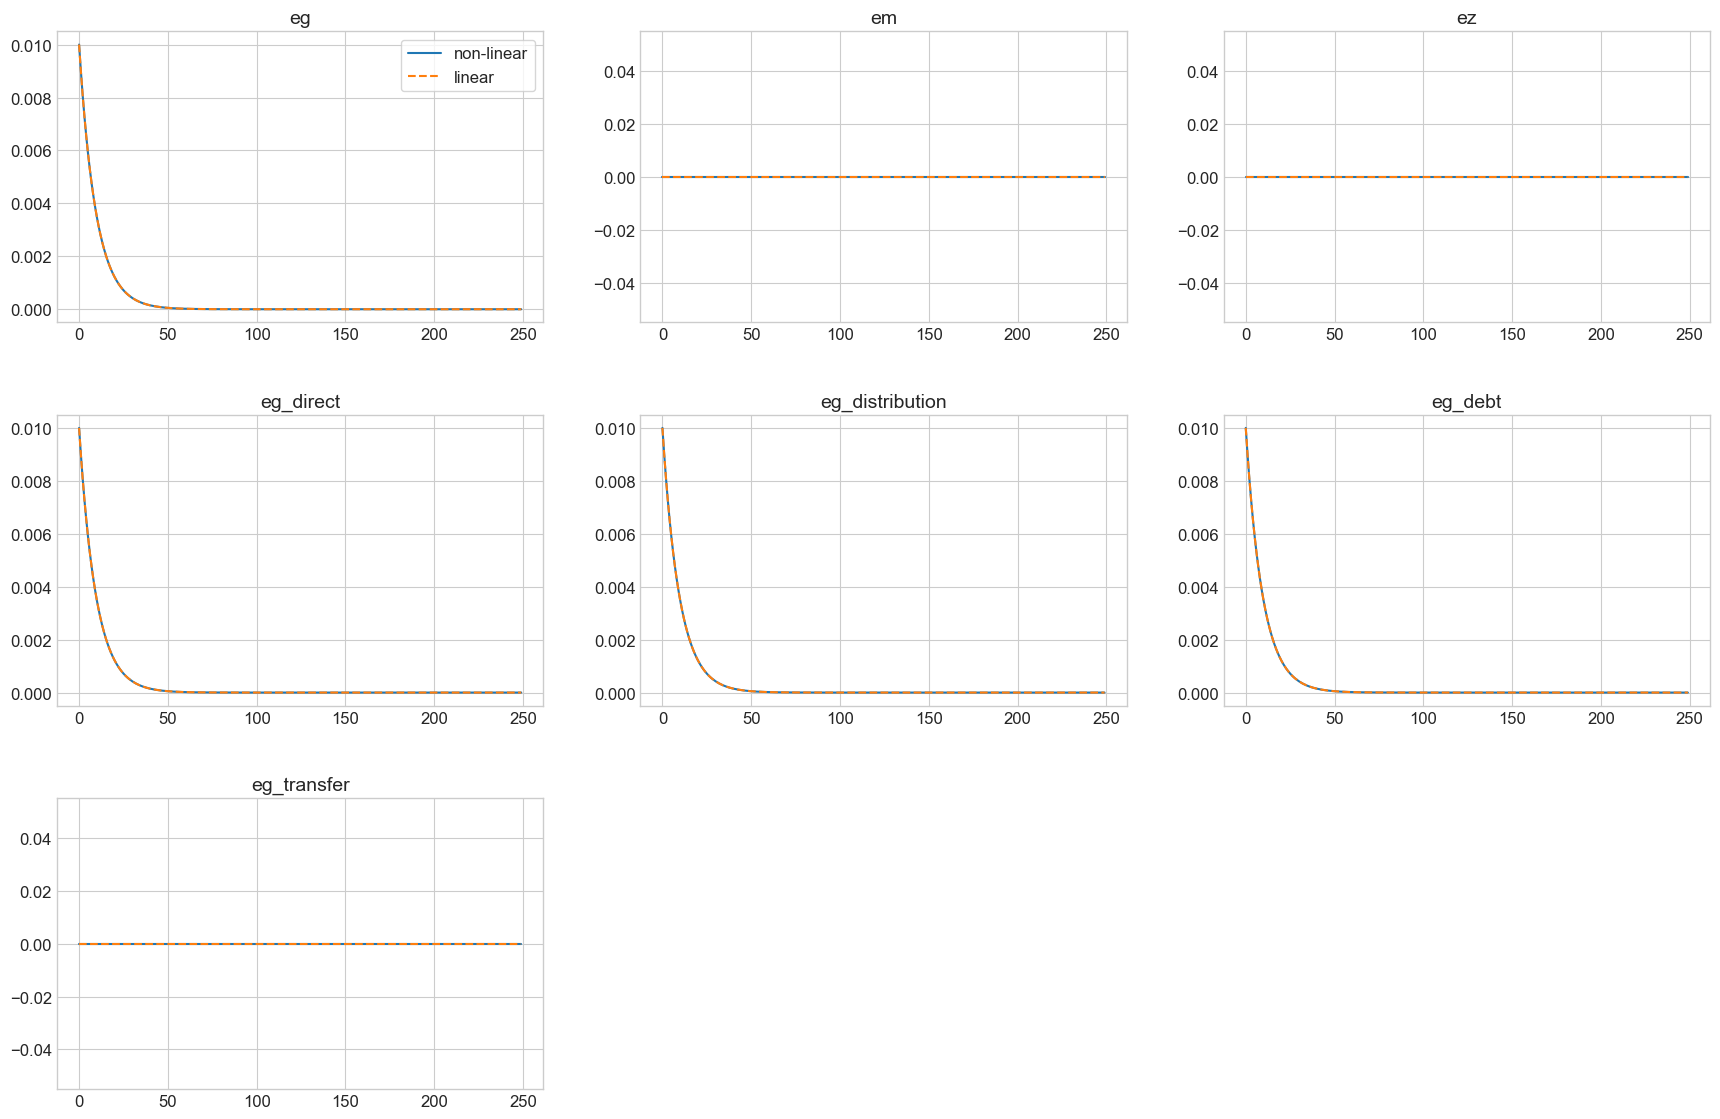


### varnames ###


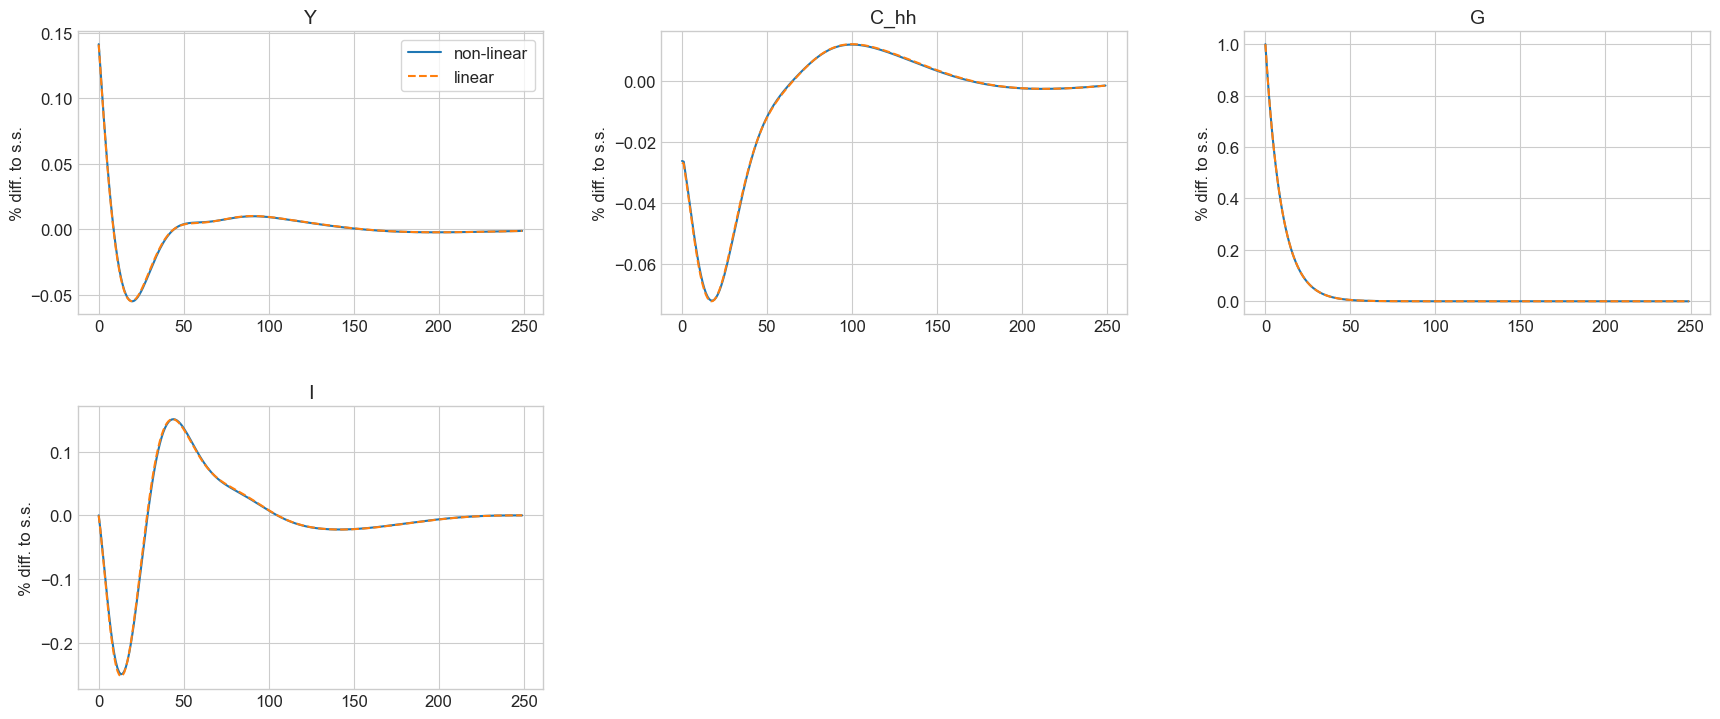


### tagets ###


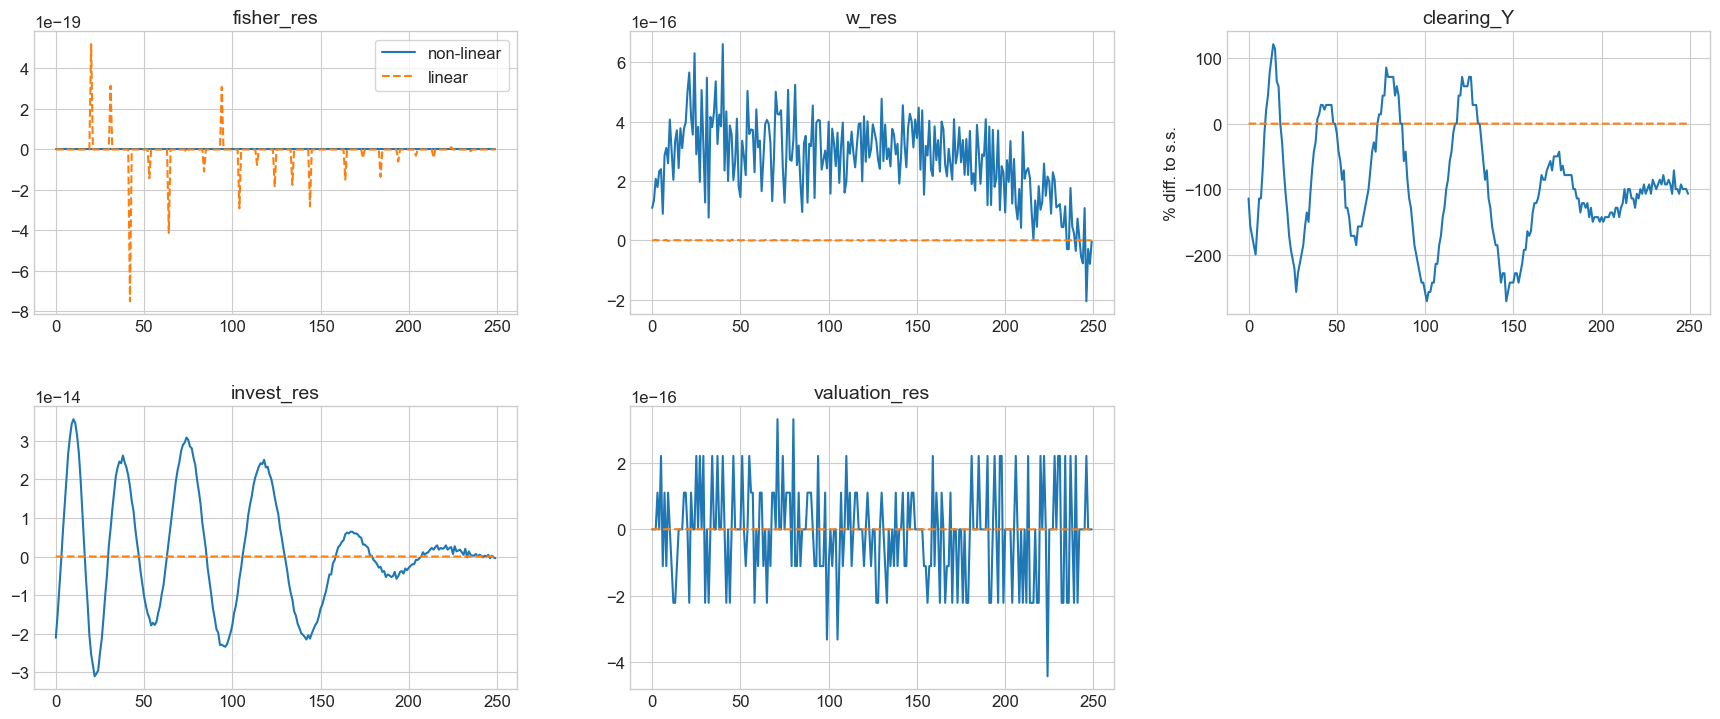

In [21]:
# paths = ['G','Y','C_hh']
paths = ['Y', 'C_hh', 'G', 'I']
paths_short = ['Y', 'C_hh', 'G']
lvl_value = ['eg', 'eg_direct', 'eg_distribution', 'eg_debt', 'eg_transfer', 'ez', 'em',  'r', 'tau', 'rk']
facs = {'r':100}
model.show_IRFs(paths,lvl_value=lvl_value,facs=facs,ncols=3,T_max=model.par.T,do_linear=True,do_shocks=True)

### shocks ###


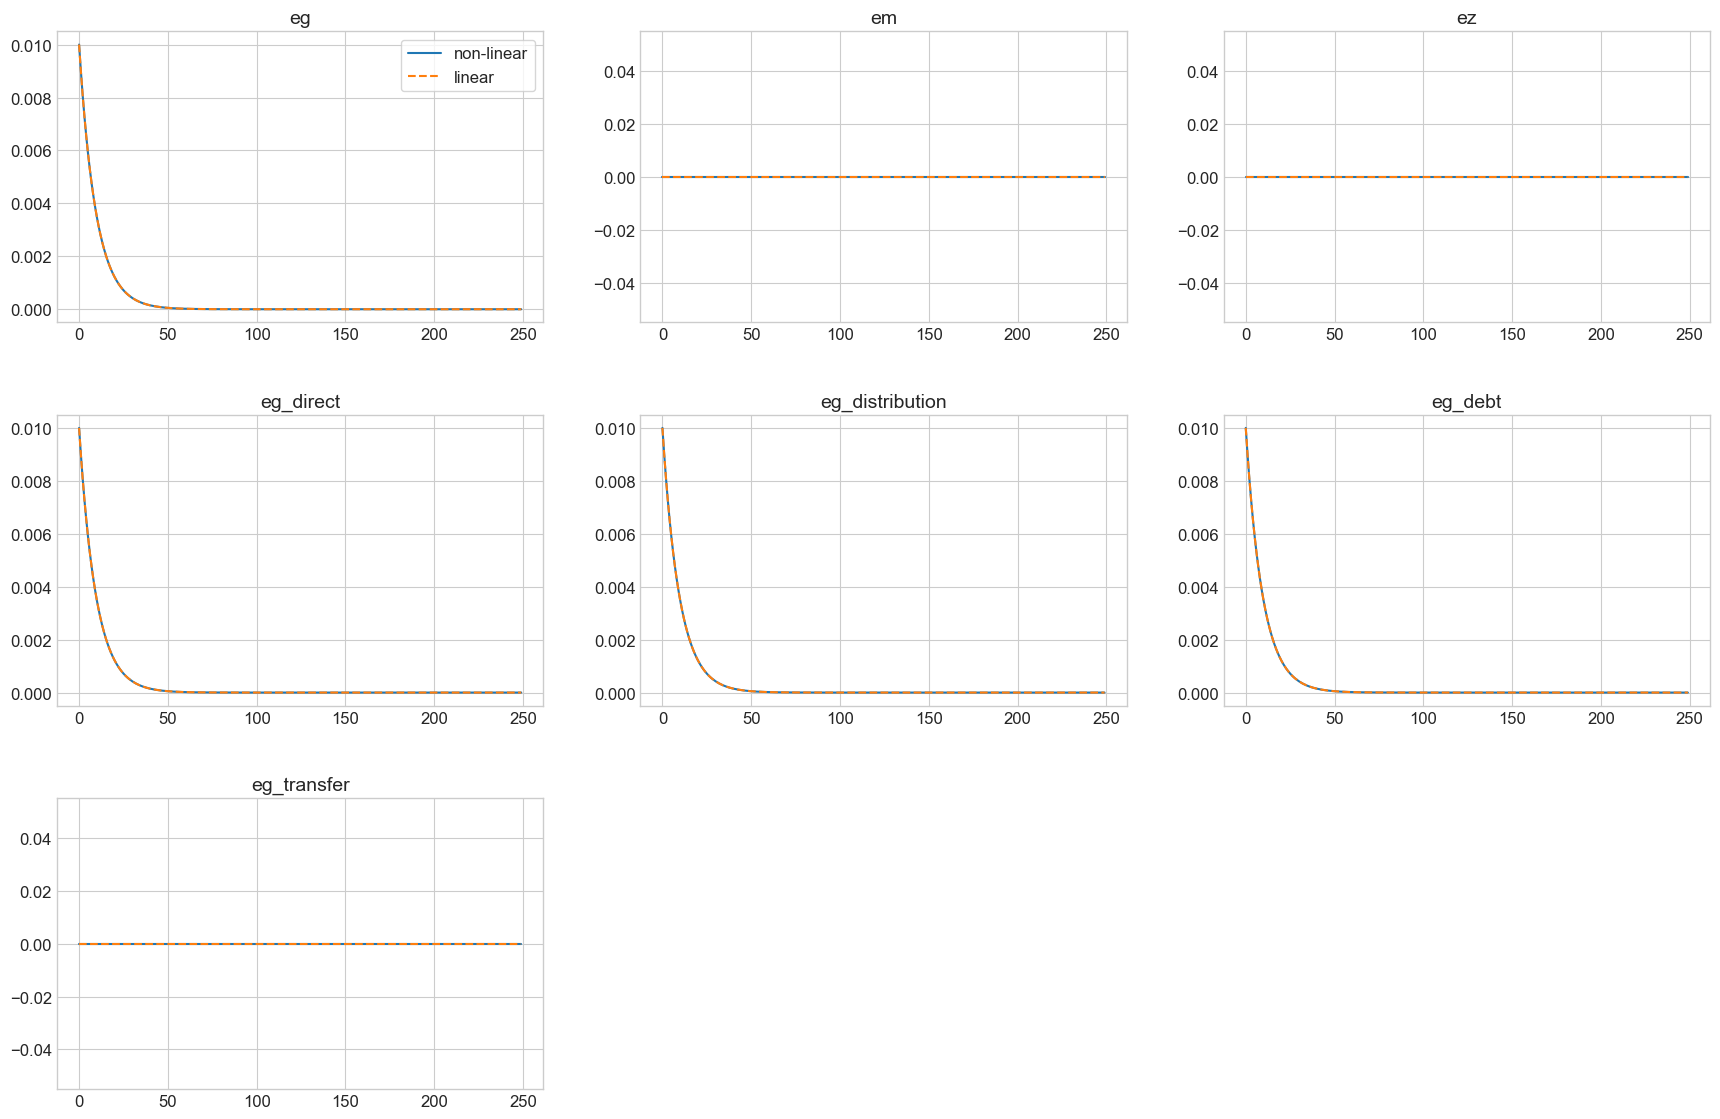


### varnames ###


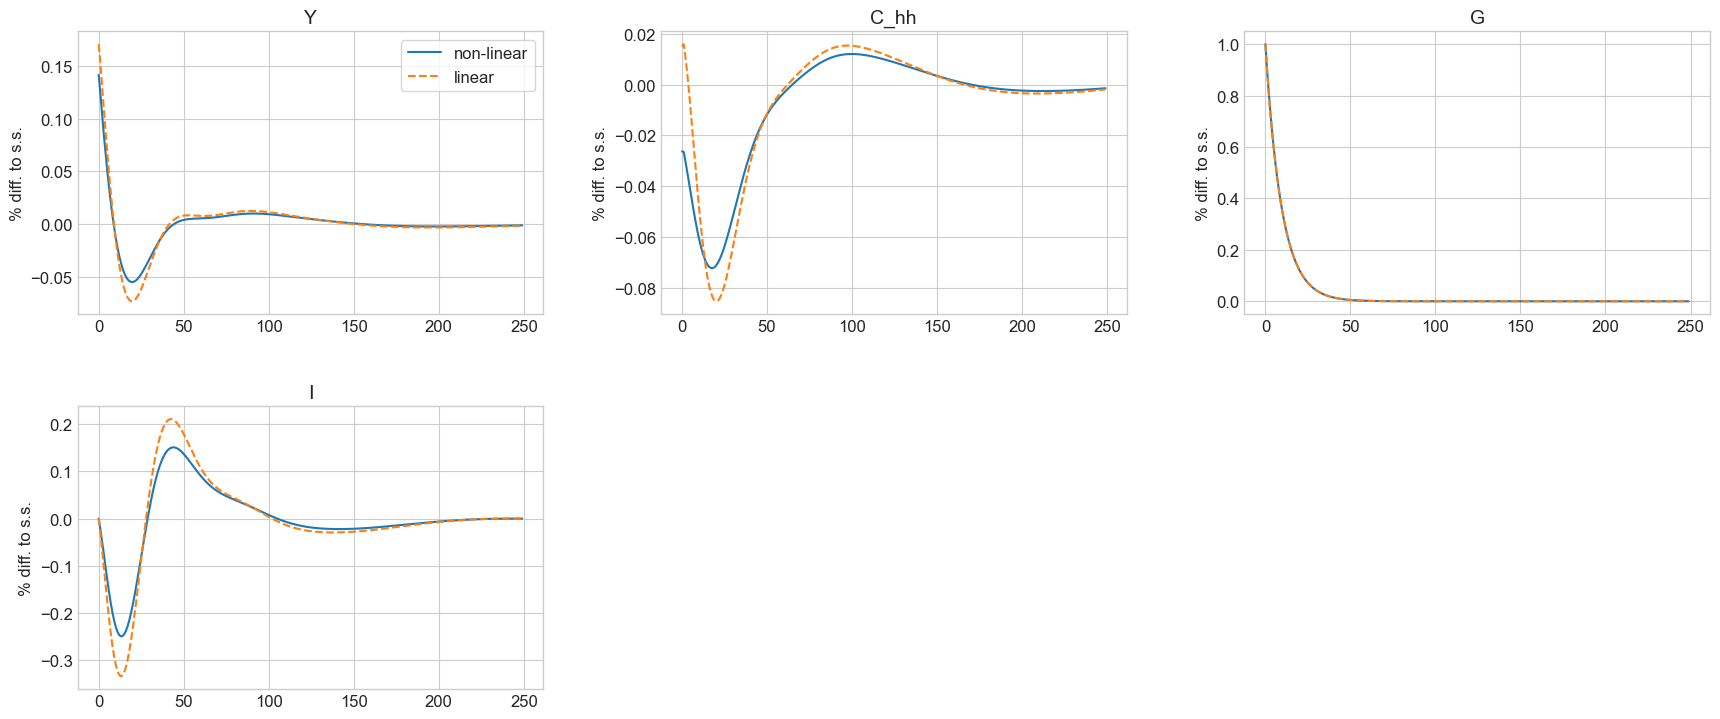


### tagets ###


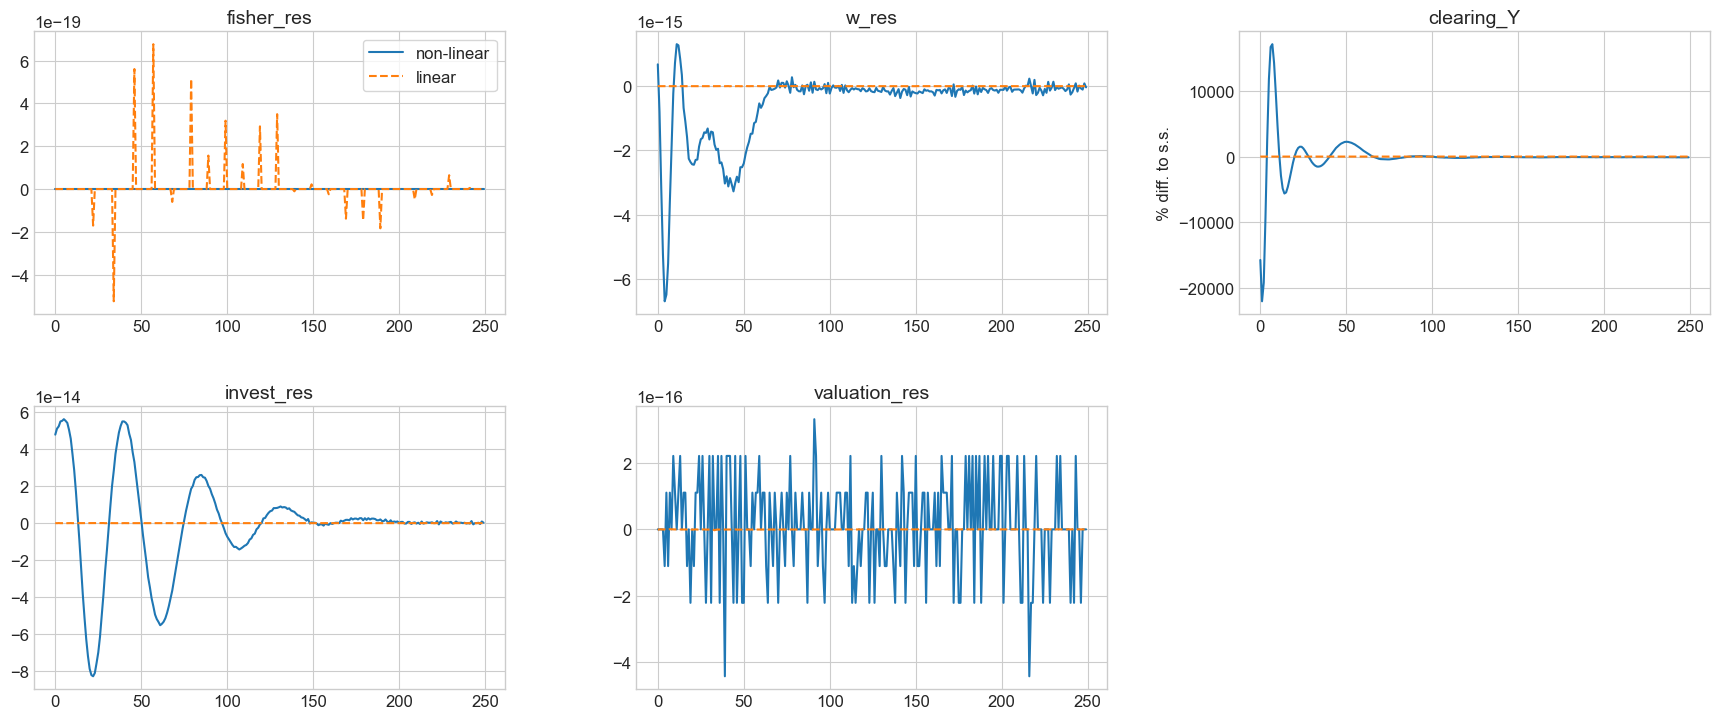

In [22]:
model_sticky.show_IRFs(paths,lvl_value=lvl_value,facs=facs,ncols=3,T_max=model.par.T,do_linear=True,do_shocks=True)

# Misc

In [10]:
# model.print_unpack_varlist()

In [11]:
# model.check_non_lin(0)

In [12]:
# print(np.max(path.A - path.A_hh))